In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [2]:
# Messdaten laden
data_cal1 = np.loadtxt('./data/zeemann_data/Kalibration_01.txt', delimiter=';') # Kalibrierung 1
data_cal2 = np.loadtxt('./data/zeemann_data/Kalibration_02.txt', delimiter=';') # Kalibrierung 2

In [3]:
# Magnetfeldkalibrierung 1
I1 = data_cal1[:, 0]  # Stromstärke in A
I1_abs = np.array([np.abs(a) for a in I1]) #
B1 = data_cal1[:, 1]  # Magnetfeld in mT
# B Fehler: 2%+0.5%*B_max - https://www.leybold-shop.de/physik/geraete/systeme/cassy/sensorboxen-sensoren/physik/5240381.html
# I Fehler: 1.5% - https://www.leybold-shop.de/physik/geraete/systeme/cassy/sensorboxen-sensoren/physik/5240431.html
I1_err = np.array([a*0.015 for a in I1_abs])  # Fehler in A
B1_err = np.array([a*0.02+max(B1)*0.005 for a in B1])  # Fehler in mT
print("Kalibrierung 1:")
print(f"Stromsträrken: {I1_abs}")
print(f"Fehler Stromstärke: {I1_err}")
print(f"Magnetfeld: {B1}")
print(f"Fehler Magnetfeld: {B1_err}")
print("==========================")
# Magnetfeldkalibrierung 2
I2 = data_cal2[:, 0]  # Stromstärke in A
I2_abs = np.array([np.abs(a) for a in I2]) #
B2 = data_cal2[:, 1]  # Magnetfeld in mT
I2_err = np.array([a*0.015 for a in I2_abs])  # Fehler in A 
B2_err = np.array([a*0.02+max(B1)*0.005 for a in B2])  # Fehler in mT
print("Kalibrierung 2:")
print(f"Stromsträrken: {I2_abs}")
print(f"Fehler Stromstärke: {I2_err}")
print(f"Magnetfeld: {B2}")
print(f"Fehler Magnetfeld: {B2_err}")

Kalibrierung 1:
Stromsträrken: [ 0.04  1.12  2.34  3.45  4.61  5.69  6.8   7.74  8.69  9.53 10.11]
Fehler Stromstärke: [0.0006  0.0168  0.0351  0.05175 0.06915 0.08535 0.102   0.1161  0.13035
 0.14295 0.15165]
Magnetfeld: [  3.  73. 150. 221. 294. 362. 421. 460. 488. 509. 523.]
Fehler Magnetfeld: [ 2.675  4.075  5.615  7.035  8.495  9.855 11.035 11.815 12.375 12.795
 13.075]
Kalibrierung 2:
Stromsträrken: [0.05 1.15 2.28 3.32 4.52 5.57 6.61 7.56 8.49 9.37 9.78]
Fehler Stromstärke: [0.00075 0.01725 0.0342  0.0498  0.0678  0.08355 0.09915 0.1134  0.12735
 0.14055 0.1467 ]
Magnetfeld: [  3.  79. 154. 221. 299. 367. 422. 460. 488. 510. 519.]
Fehler Magnetfeld: [ 2.675  4.195  5.695  7.035  8.595  9.955 11.055 11.815 12.375 12.815
 12.995]


Kalibrierung 1 Fitparameter: a=-0.29830696464000245, b=2.0901573743395794, c=60.78183088744345, d=0.9270451998103557
Kalibrierung 2 Fitparameter: a=-0.2965653120060276, b=1.6196298246137566, c=65.44571368762347, d=0.09922205958367927
======Dataframes und Latex======
     Kalibrierung         a     a_err         b     b_err          c  \
0  Kalibrierung 1 -0.298307  0.093500  2.090157  1.265280  60.781831   
1  Kalibrierung 2 -0.296565  0.102401  1.619630  1.348625  65.445714   

      c_err         d     d_err  
0  4.207754  0.927045  2.697581  
1  4.362331  0.099222  2.734834  
\begin{tabular}{lrrrrrrrr}
\toprule
Kalibrierung & a & a_err & b & b_err & c & c_err & d & d_err \\
\midrule
Kalibrierung 1 & -0.298 & 0.094 & 2.090 & 1.265 & 60.782 & 4.208 & 0.927 & 2.698 \\
Kalibrierung 2 & -0.297 & 0.102 & 1.620 & 1.349 & 65.446 & 4.362 & 0.099 & 2.735 \\
\bottomrule
\end{tabular}

======Plots und Fits======


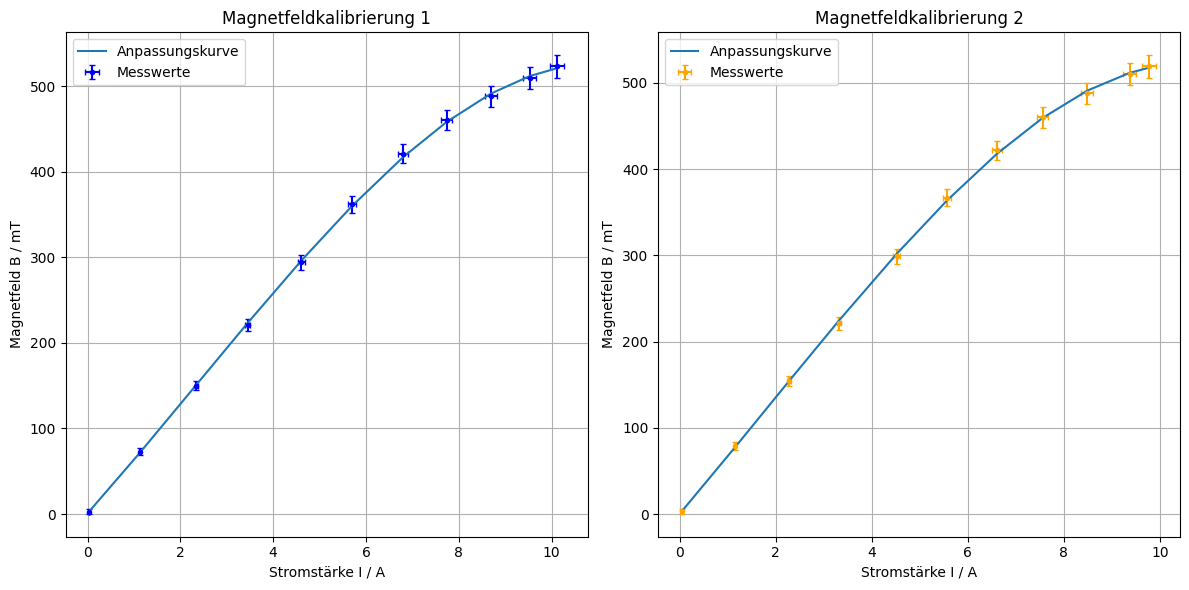

popt_new = array([-0.29743614,  1.8548936 , 63.11377229,  0.51313363])
pcov_new = array([[ 9.61412109e-03, -1.25903006e-01,  3.66159077e-01,
        -9.36009482e-02],
       [-1.25903006e-01,  1.70986229e+00, -5.28784968e+00,
         1.52139259e+00],
       [ 3.66159077e-01, -5.28784968e+00,  1.83675657e+01,
        -6.84242492e+00],
       [-9.36009482e-02,  1.52139259e+00, -6.84242492e+00,
         7.37813128e+00]])
----------------
popt1 = array([-0.29830696,  2.09015737, 60.78183089,  0.9270452 ])
pcov1 = array([[ 8.74232606e-03, -1.16166037e-01,  3.42851277e-01,
        -8.82863281e-02],
       [-1.16166037e-01,  1.60093394e+00, -5.02420338e+00,
         1.45658309e+00],
       [ 3.42851277e-01, -5.02420338e+00,  1.77051957e+01,
        -6.64971559e+00],
       [-8.82863281e-02,  1.45658309e+00, -6.64971559e+00,
         7.27694469e+00]])
popt2 = array([-0.29656531,  1.61962982, 65.44571369,  0.09922206])
pcov2 = array([[ 1.04859161e-02, -1.35639975e-01,  3.89466876e-01,
        

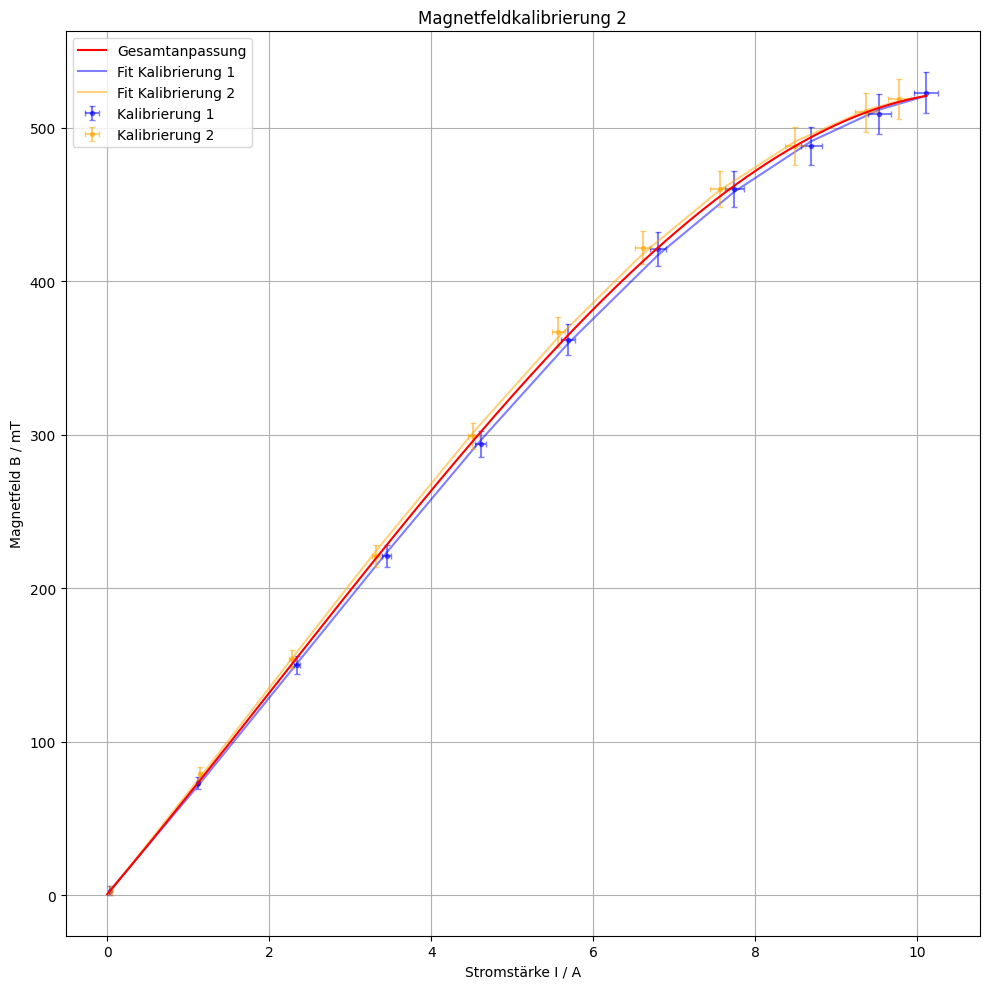

In [8]:
# Plot und Fit
# Polynom 3. Grades
def func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d
# Fit Kalibrierung 1
x_arr1 = I1_abs
y_arr1 = B1
x_err1 = I1_err
y_err1 = B1_err
popt1, pcov1 = curve_fit(func, x_arr1, y_arr1, sigma=y_err1, absolute_sigma=True)
a1, b1, c1, d1 = popt1
print(f"Kalibrierung 1 Fitparameter: a={a1}, b={b1}, c={c1}, d={d1}")
# Fit Kalibrierung 2
x_arr2 = I2_abs
y_arr2 = B2
x_err2 = I2_err
y_err2 = B2_err
popt2, pcov2 = curve_fit(func, x_arr2, y_arr2, sigma=y_err2, absolute_sigma=True)
a2, b2, c2, d2 = popt2
print(f"Kalibrierung 2 Fitparameter: a={a2}, b={b2}, c={c2}, d={d2}")
# Fitparameter in DataFrame speichern
print("======Dataframes und Latex======")
df = pd.DataFrame({
    'Kalibrierung': ['Kalibrierung 1', 'Kalibrierung 2'],
    'a': [a1, a2],
    'a_err': [np.sqrt(pcov1[0][0]), np.sqrt(pcov2[0][0])],
    'b': [b1, b2],
    'b_err': [np.sqrt(pcov1[1][1]), np.sqrt(pcov2[1][1])],
    'c': [c1, c2],
    'c_err': [np.sqrt(pcov1[2][2]), np.sqrt(pcov2[2][2])],
    'd': [d1, d2],
    'd_err': [np.sqrt(pcov1[3][3]), np.sqrt(pcov2[3][3])],
})
print(df)
# Latex Tabelle
latex_table = df.to_latex(index=False, float_format="%.3f", escape=False)
print(latex_table)	


print("======Plots und Fits======")
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Plot Kalibrierung 1
ax[0].errorbar(I1_abs, B1, xerr=I1_err, yerr=B1_err, fmt='.', label='Messwerte', color='blue', capsize=2)
ax[0].plot(x_arr1, func(x_arr1, *popt1), '-', label='Anpassungskurve')
ax[0].set_xlabel('Stromstärke I / A')
ax[0].set_ylabel('Magnetfeld B / mT')
ax[0].set_title('Magnetfeldkalibrierung 1')
ax[0].legend()
ax[0].grid()
# Plot Kalibrierung 2
ax[1].errorbar(I2_abs, B2, xerr=I2_err, yerr=B2_err, fmt='.', label='Messwerte', color='orange', capsize=2)
ax[1].plot(x_arr2, func(x_arr2, *popt2), '-', label='Anpassungskurve')
ax[1].set_xlabel('Stromstärke I / A')
ax[1].set_ylabel('Magnetfeld B / mT')
ax[1].set_title('Magnetfeldkalibrierung 2')
ax[1].legend()
ax[1].grid()
plt.tight_layout()
plt.savefig('plots/zeeman_plt/zeeman_pltKalibrierung_1_2.png', dpi=300)
plt.show()

# Plot und Fit mit Gesamtanpassung
x_bar = np.linspace(0, max(I1_abs), 1000)
y_bar = (func(x_bar, *popt1) + func(x_bar, *popt2))/2
popt_new = (popt1 + popt2) / 2
pcov_new = (pcov1 + pcov2) / 2
print(f'{popt_new = }')
print(f'{pcov_new = }')
print('----------------')
print(f'{popt1 = }')
print(f'{pcov1 = }')
print(f'{popt2 = }')
print(f'{pcov2 = }')
print("======Gesamtanpassung======")
print(f"Gesamtanpassung Fitparameter: a={popt_new[0]}, b={popt_new[1]}, c={popt_new[2]}, d={popt_new[3]}")
print(f"Gesamtanpassung Fitparameter Fehler: a={np.sqrt(pcov_new[0][0])}, b={np.sqrt(pcov_new[1][1])}, c={np.sqrt(pcov_new[2][2])}, d={np.sqrt(pcov_new[3][3])}")
# Gesamtanpassung in DataFrame speichern
df_total = pd.DataFrame({
    'Gesamtanpassung': ['Gesamtanpassung'],
    'a': [popt_new[0]],
    'a_err': [np.sqrt(pcov_new[0][0])],
    'b': [popt_new[1]],
    'b_err': [np.sqrt(pcov_new[1][1])],
    'c': [popt_new[2]],
    'c_err': [np.sqrt(pcov_new[2][2])],
    'd': [popt_new[3]],
    'd_err': [np.sqrt(pcov_new[3][3])],
})
print(df_total)
# Latex Tabelle Gesamtanpassung
latex_table_total = df_total.to_latex(index=False, float_format="%.3f", escape=False)
print(latex_table_total)
# Plot mit Gesamtanpassung

plt.figure(figsize=(10, 10))
plt.plot(x_bar, y_bar, '-', label='Gesamtanpassung', color='red', zorder=3)
plt.errorbar(I1_abs, B1, xerr=I1_err, yerr=B1_err, fmt='.', label='Kalibrierung 1',color='blue', capsize=2, alpha=0.5)
plt.plot(x_arr1, func(x_arr1, *popt1), '-', label='Fit Kalibrierung 1', color='blue', alpha=0.5)
# Plot Kalibrierung 2
plt.errorbar(I2_abs, B2, xerr=I2_err, yerr=B2_err, fmt='.', label='Kalibrierung 2', color='orange', capsize=2, alpha=0.5)
plt.plot(x_arr2, func(x_arr2, *popt2), '-', label='Fit Kalibrierung 2', color='orange', alpha=0.5)
plt.xlabel('Stromstärke I / A')
plt.ylabel('Magnetfeld B / mT')
plt.title('Magnetfeldkalibrierung 2')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('plots/zeeman_plt/zeeman_pltKalibrierung_gesamt.png', dpi=300)
plt.show()



In [6]:
I = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) # Beispielwerte für I
def dI_new(I, bla):
    return 0.02*func(I[bla], *popt_new) + 0.005
for i in range(len(I)):
    print(fr'B-Feld für {I[i]} A: ' '%5.5f' % func(I[i], *popt_new), 'mT +/- ', '%5.5f' % dI_new(I, i))

B-Feld für 1 A: 65.18436 mT +/-  1.30869
B-Feld für 2 A: 131.78076 mT +/-  2.64062
B-Feld für 3 A: 198.51772 mT +/-  3.97535
B-Feld für 4 A: 263.61061 mT +/-  5.27721
B-Feld für 5 A: 325.27482 mT +/-  6.51050
B-Feld für 6 A: 381.72573 mT +/-  7.63951
B-Feld für 7 A: 431.17873 mT +/-  8.62857
B-Feld für 8 A: 471.84920 mT +/-  9.44198
B-Feld für 9 A: 501.95252 mT +/-  10.04405
B-Feld für 10 A: 519.70408 mT +/-  10.39908
